In [22]:
pip install pmdarima

In [29]:
import math
import io

In [30]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns

%matplotlib inline

In [32]:
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [36]:
df = pd.read_csv('train.csv', parse_dates=['date'])


# Mục mới

In [37]:
df.groupby("store_nbr").unit_sales.sum()

store_nbr
1     136374.416
2     195168.866
3     445768.398
4     188534.070
5     183800.027
6     249469.802
7     211020.624
8     281577.184
9     246860.512
10    101939.659
11    279903.316
12    112791.357
13    103567.439
14    139002.776
15    114588.280
16    123761.887
17    151255.838
18    127798.417
19    107649.334
23    135364.981
24    255611.213
25    114804.369
26    100958.202
27    145029.128
28    110819.512
30     62324.039
31    143143.910
32     59732.854
33    127079.340
34    161268.060
35     62160.717
37    201669.350
38    184934.379
39    168890.714
40    110787.775
41    102707.301
43    107103.509
44    615660.239
45    487900.733
46    440871.510
47    482367.503
48    354525.420
49    251818.884
50    292257.710
51    303654.532
54     91602.032
Name: unit_sales, dtype: float64

In [38]:
store_45 = df.query('store_nbr == "45"')

In [39]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales
0,0,2013-01-01,25,103665,7.0
1,1,2013-01-01,25,105574,1.0
2,2,2013-01-01,25,105575,2.0
3,3,2013-01-01,25,108079,1.0
4,4,2013-01-01,25,108701,1.0


In [40]:
store_45 = store_45.groupby('date').unit_sales.sum().reset_index()

In [41]:
store_45

,date,unit_sales
0,2013-01-02,27612.051
1,2013-01-03,17377.981
2,2013-01-04,19936.195
3,2013-01-05,27104.223
4,2013-01-06,31532.038
5,2013-01-07,17309.963
6,2013-01-08,14230.149
7,2013-01-09,15477.240
8,2013-01-10,10848.866
9,2013-01-11,14211.401


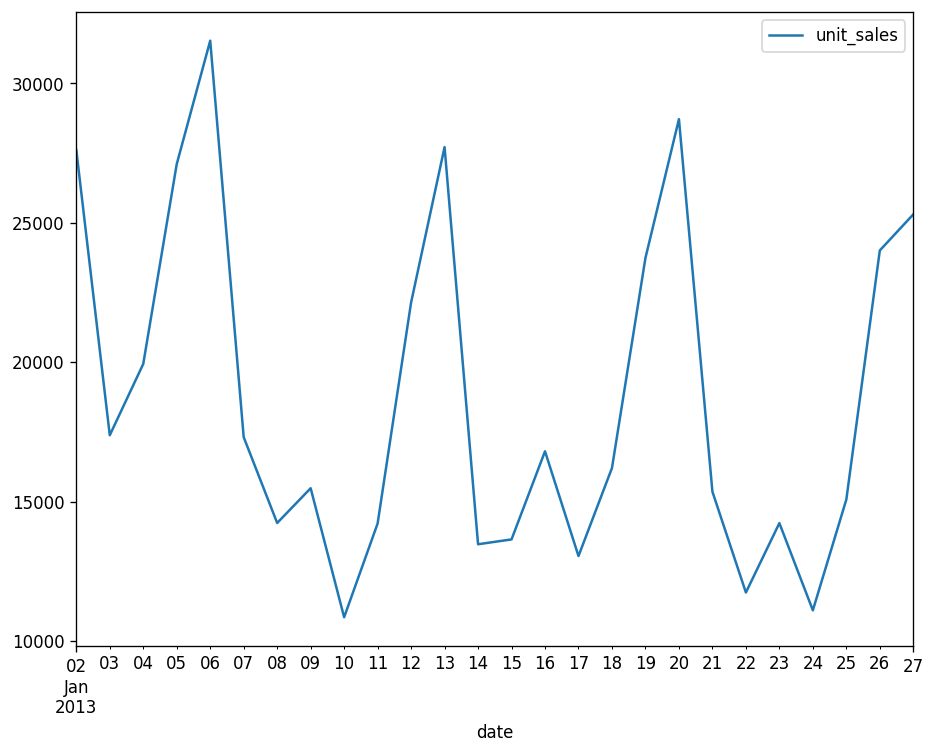

In [42]:
store_45.plot(x='date',y='unit_sales')

In [44]:
store_45.describe()

,unit_sales
count,26.000000
mean,18765.412808
std,6222.710946
min,10848.866000
25%,14214.956250
50%,16502.000500
75%,23940.287750
max,31532.038000


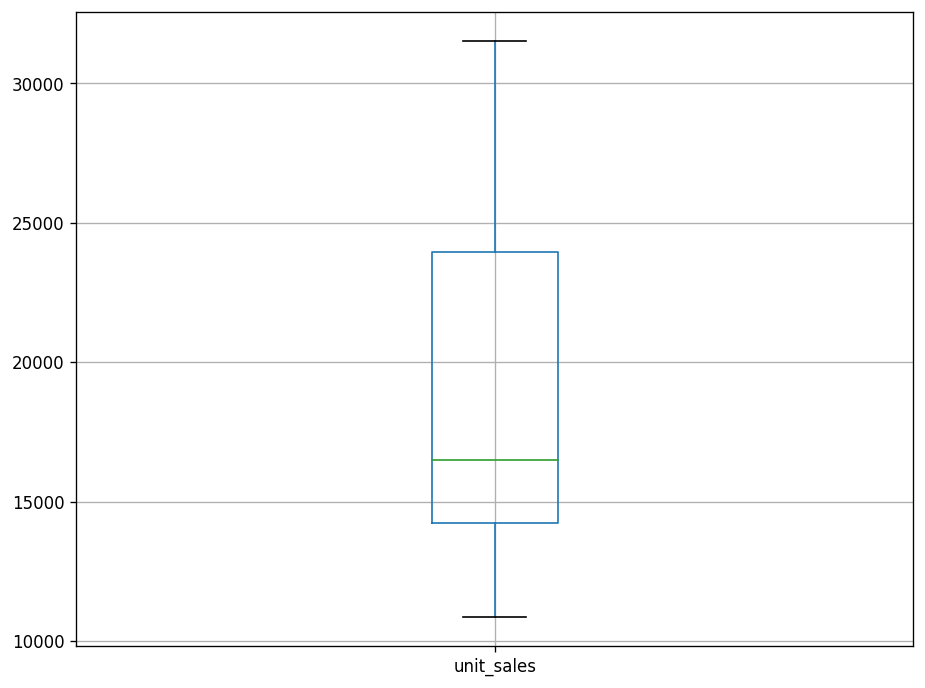

In [45]:
store_45.boxplot()

In [46]:
store_45 =store_45[['date', 'unit_sales']]
store_45= store_45.set_index('date')
store_45

,unit_sales
date,
2013-01-02,27612.051
2013-01-03,17377.981
2013-01-04,19936.195
2013-01-05,27104.223
2013-01-06,31532.038
2013-01-07,17309.963
2013-01-08,14230.149
2013-01-09,15477.240
2013-01-10,10848.866


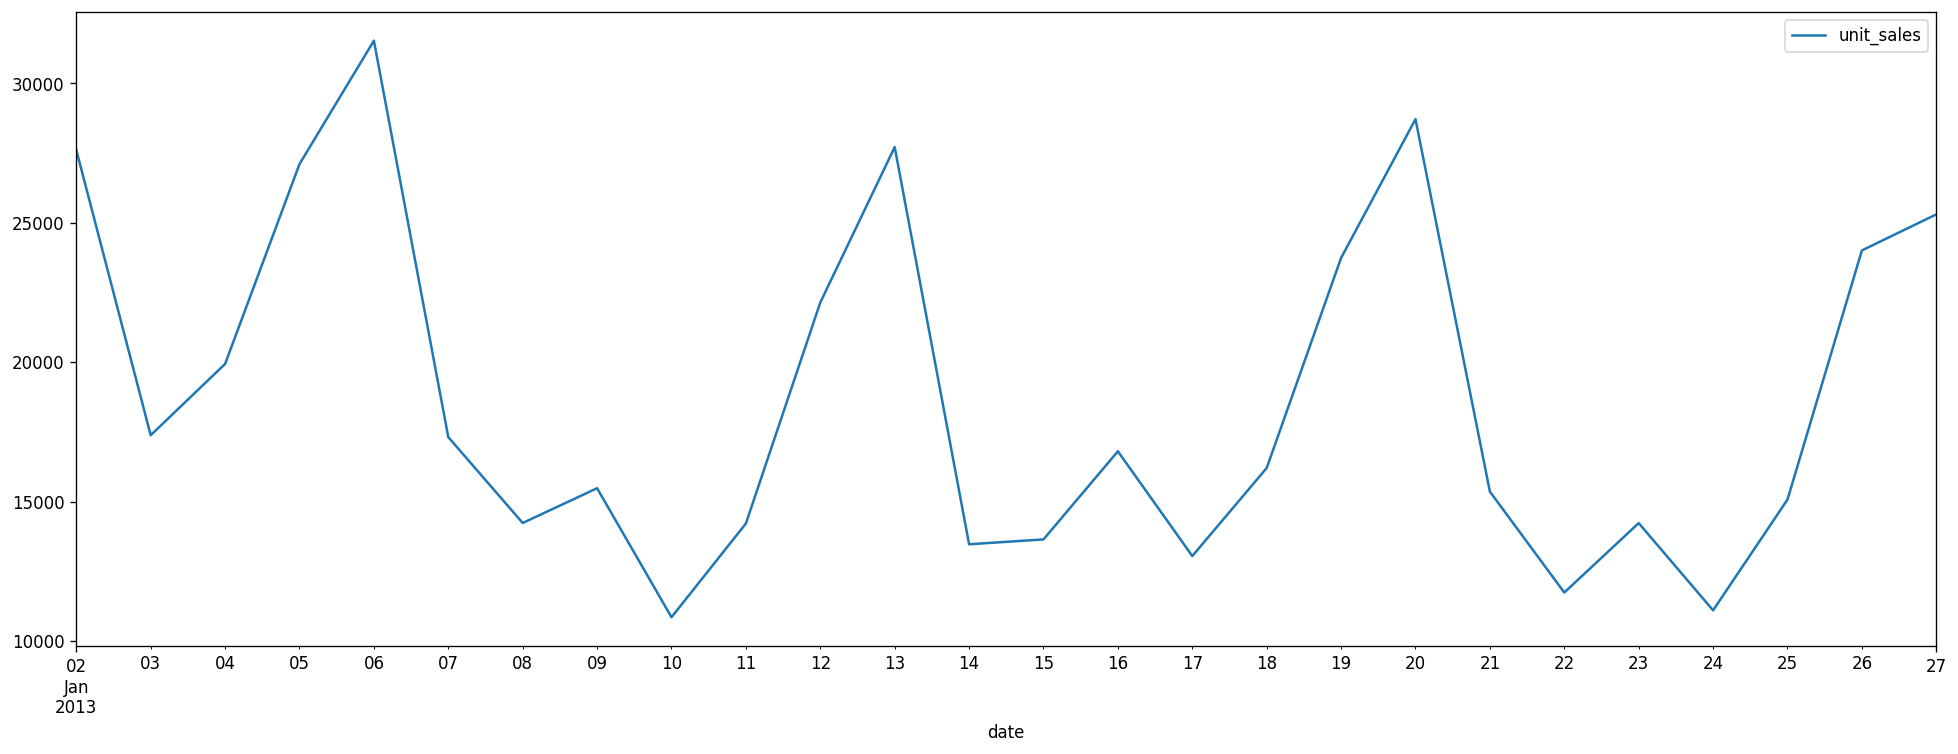

In [47]:
store_45.plot(figsize= (20,7))
plt.show()

In [48]:
#Chia du lieu
train= store_45[:20]
test= store_45[-6:]

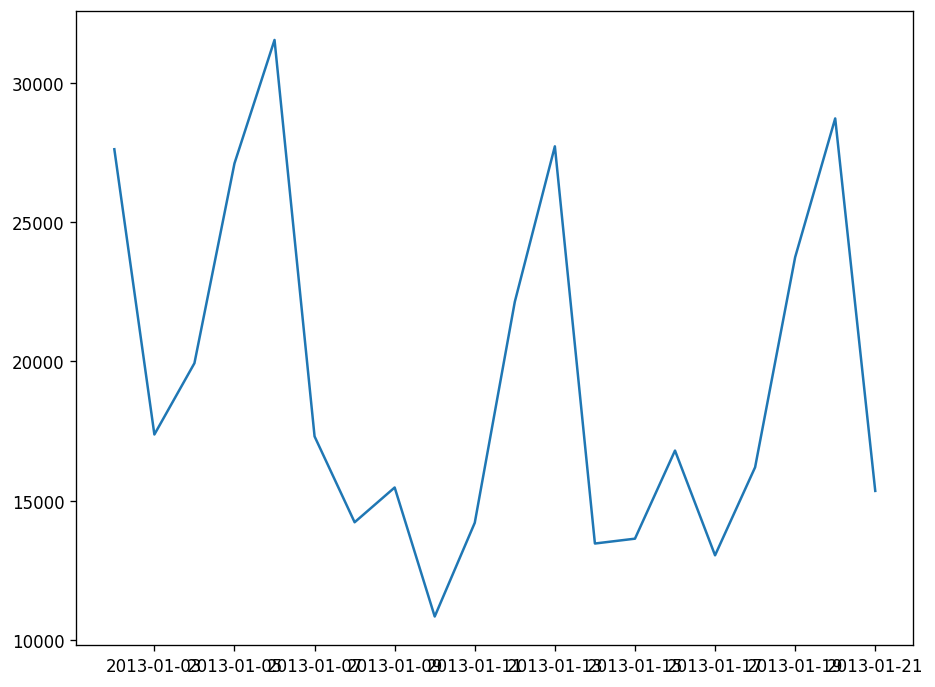

In [62]:
plt.plot(train)


In [65]:
series=train['unit_sales']

In [66]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(series)

KPSS Statistic: 0.23256995442400996
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

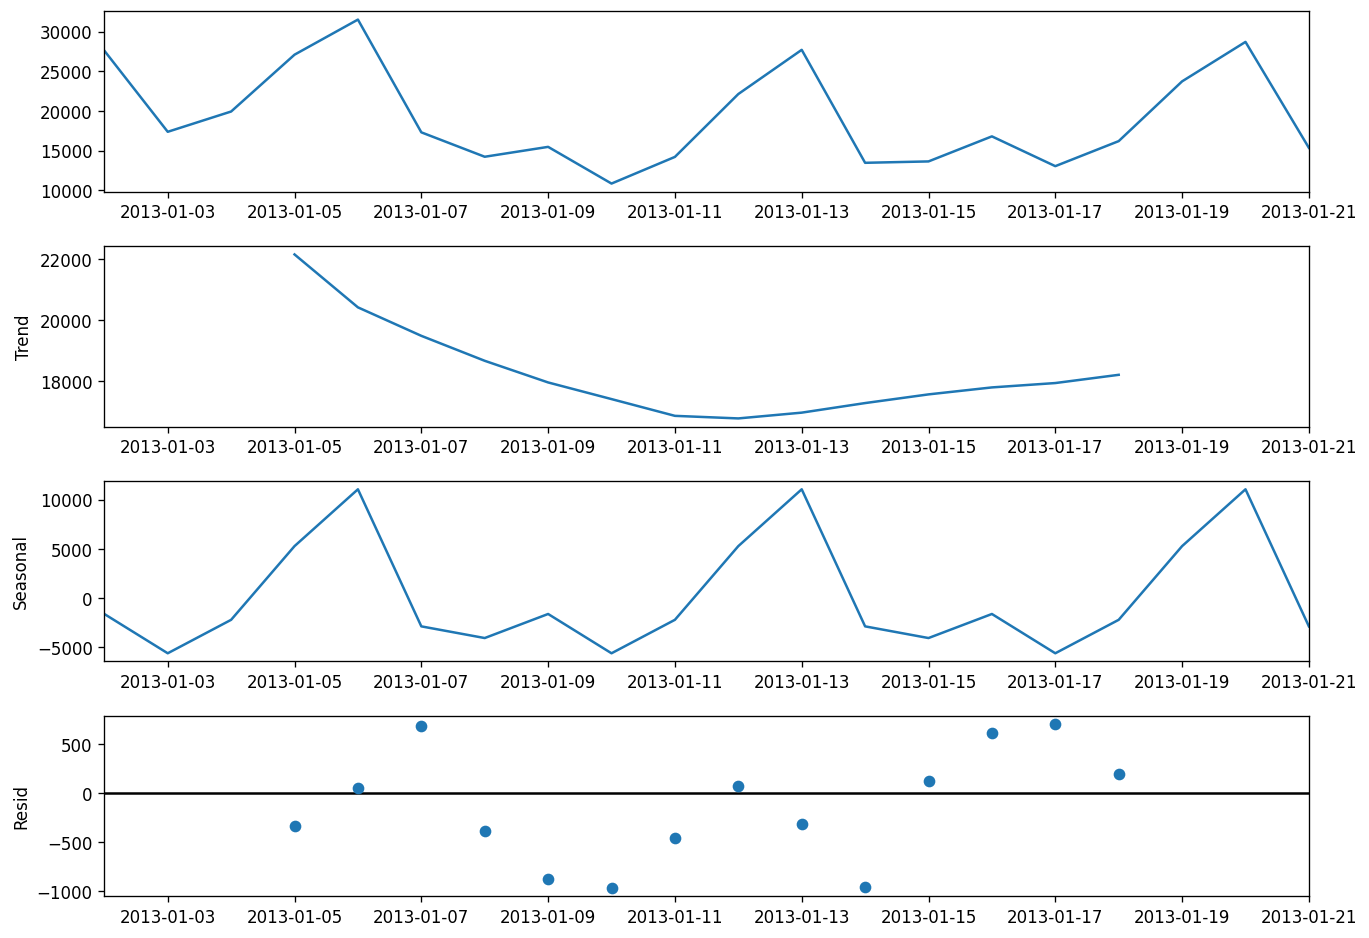

In [53]:
result = seasonal_decompose(train, model='additive')
fig = result.plot()
fig.set_size_inches(12,8)
x=result.observed

<Figure size 1440x720 with 0 Axes>

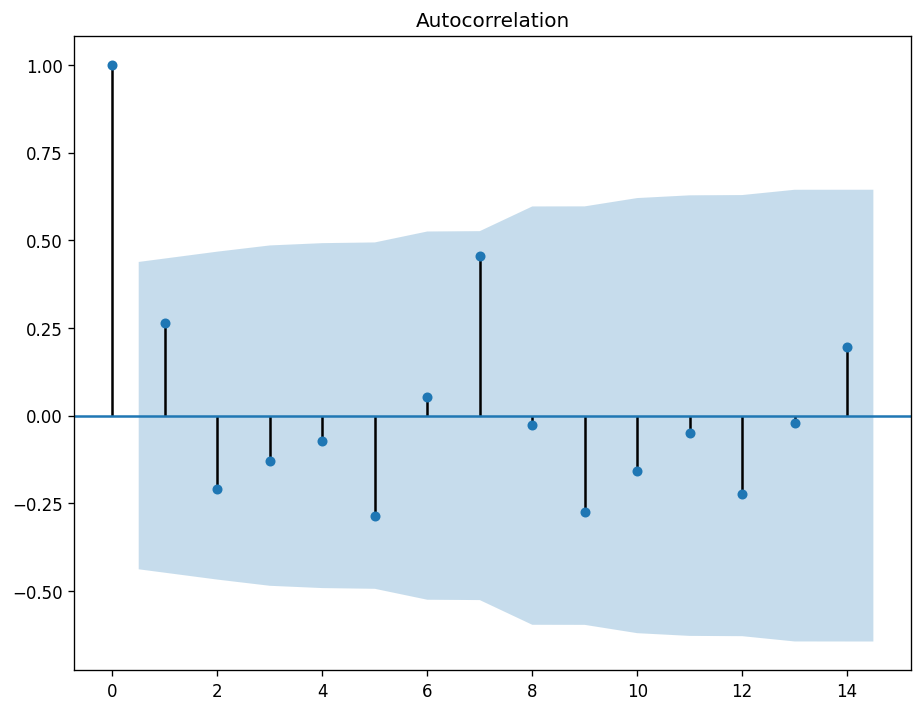

In [54]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
ax1 = plot_acf(x)

#Chuỗi dừng ở sai phân bậc 1

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [68]:
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=7, max_q=0, m=0,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=455.432, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=418.348, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=420.343, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=417.090, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=418.689, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 0.190 seconds


In [69]:
model_fit = model.fit(y=train, disp=0)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -204.545
Date:                Sun, 04 Apr 2021   AIC                            417.090
Time:                        12:45:50   BIC                            421.073
Sample:                             0   HQIC                           417.867
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9341      0.316      2.958      0.003       0.315       1.553
ar.L2         -0.5044      0.475     -1.062      0.288      -1.435       0.426
ar.L3          0.5443      0.248      2.197      0.0

<Figure size 1440x720 with 0 Axes>

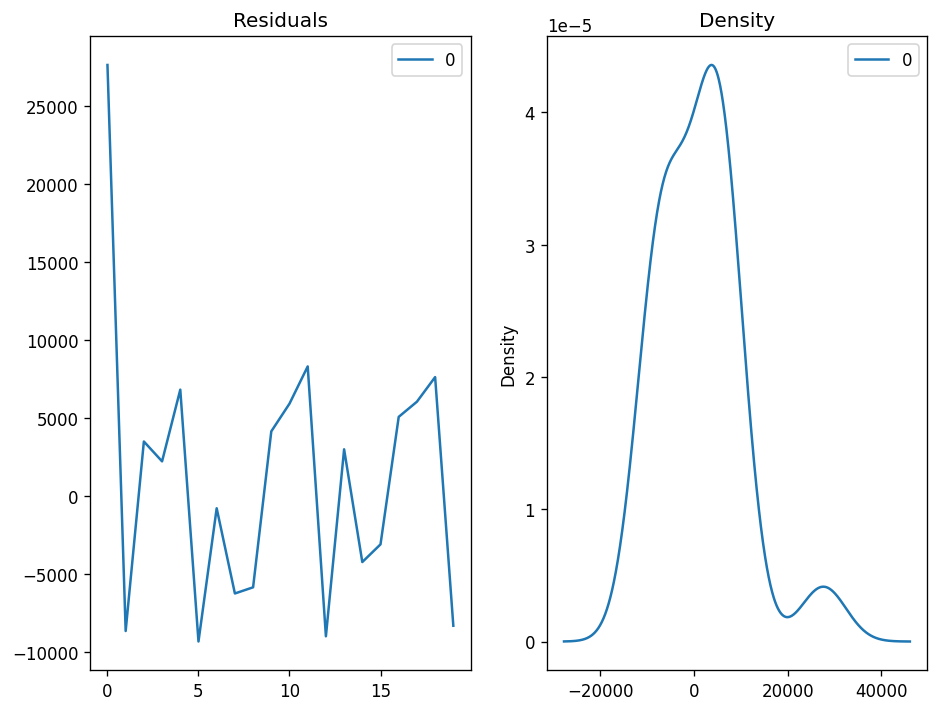

In [58]:
# Kiem tra phuong sai
residuals = pd.DataFrame(model_fit.resid())
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [59]:
start = len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

[12780.50609906 19825.7543348  20431.35469057 16042.40713365
 15472.2036042  17482.91472734 17259.65961523 15726.569898
 15501.61019221 15943.20397428]


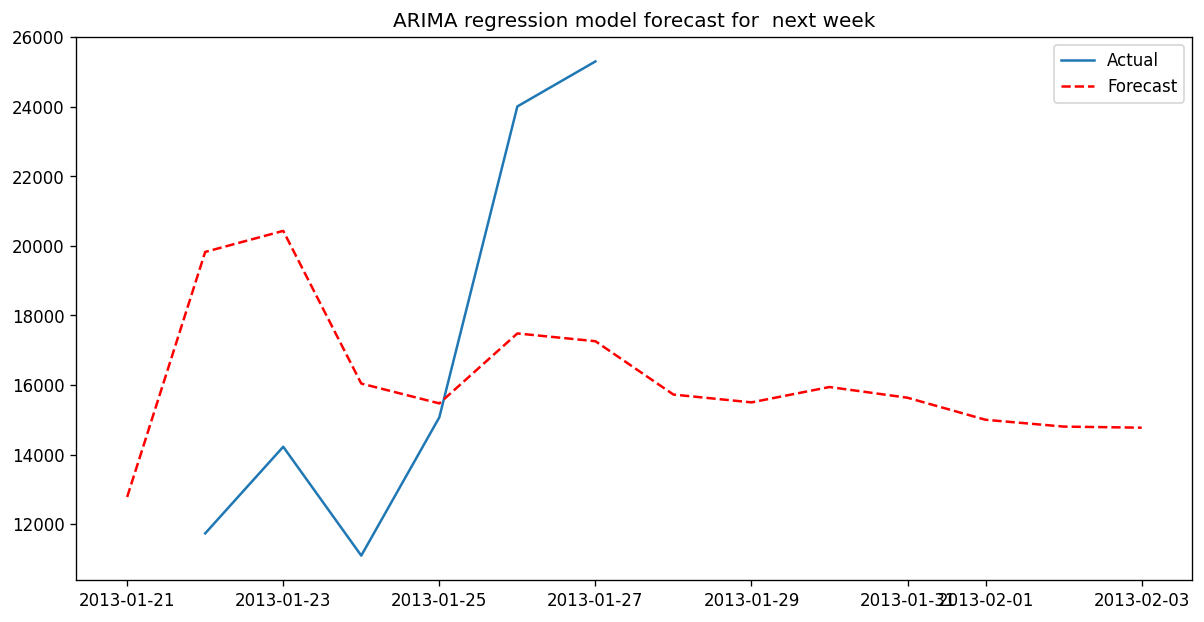

In [60]:
n_pred_perious = 14
fitted, confint = model_fit.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='D')

fitted_seri = pd.Series(fitted, index=date)
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
plt.legend()
plt.title('ARIMA regression model forecast for  next week')
plt.show()

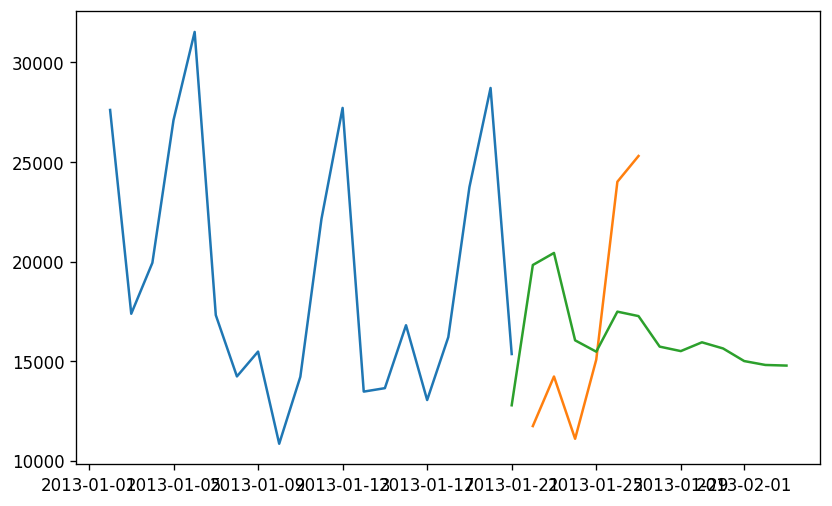

In [61]:
plt.figure(figsize = (8,5))
plt.plot(train, label = "Training")
plt.plot(test,label = "Testing")
plt.plot(fitted_seri,label = "Prediction")
plt.show()